In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test)=imdb.load_data(num_words=10000)

In [3]:
word_index=imdb.get_word_index()

In [4]:
len(word_index)

88584

## What is Enumeration
A lot of times when dealing with iterators, we also get a need to keep a count of iterations. Python eases the programmers’ task by providing a built-in function enumerate() for this task.
Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.

In [5]:
l1 = ["eat","sleep","repeat"] 
s1 = "geek"
  
# creating enumerate objects 
obj1 = enumerate(l1) 
obj2 = enumerate(s1) 
  
#print "Return type:",type(obj1) 
print (list(enumerate(l1))) 
  
# changing start index to 2 from 0 
print (list(enumerate(s1,2)))

[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(2, 'g'), (3, 'e'), (4, 'e'), (5, 'k')]


In [6]:
def vectorize(sentences,dim=10000):
    outputs=np.zeros((len(sentences),dim))
    
    
    for i,ix in enumerate(sentences):
        outputs[i,ix]=1
    return outputs
        

In [7]:
x_train=vectorize(X_train)
x_test=vectorize(X_test)

In [8]:
x_train.shape,x_test.shape

((25000, 10000), (25000, 10000))

In [9]:
type(word_index)

dict

In [10]:
index_word=dict([(ix,wd) for wd,ix in word_index.items()])

In [11]:
" ".join([index_word[ix] for ix in X_train[3]])

"the of and and they halfway of identity went plot actors watch of share was well these can this only and ten so failing feels only novak killer theo of bill br and would find of films saw grade about hated it for br so ten remain by in of songs are of and gigantic is morality it's her or know would care i i br screen that obvious plot actors new would with paris not have attempt lead or of too would local that of every their it coming this eleven of information to and br singers movie was anxious that film is under by left this and is entertainment ok this in own be house of sticks worker in bound my i i obviously sake things just as lost lot br comes never like thing start of obviously comes indeed coming want no bad than history from lost comes accidentally young to movie bad facts dream from reason these honor movie elizabeth it's movie so fi and enough to computer duo film and almost jeffrey rarely obviously and alive to appears i i only human it and just only hop to be hop new ma

In [12]:
x_train.shape,x_test.shape

((25000, 10000), (25000, 10000))

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model =Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(x_train.shape[1],) ) )
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,288,449
Trainable params: 1,288,449
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [16]:
hist = model.fit(x_train, Y_train, batch_size=64, epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 836us/step - loss: 0.3271 - acc: 0.8615 - val_loss: 0.2751 - val_acc: 0.8936
Epoch 2/10
20000/20000 [==============================] - 16s 789us/step - loss: 0.1540 - acc: 0.9414 - val_loss: 0.3021 - val_acc: 0.8826
Epoch 3/10
20000/20000 [==============================] - 15s 774us/step - loss: 0.0649 - acc: 0.9772 - val_loss: 0.4282 - val_acc: 0.8744
Epoch 4/10
20000/20000 [==============================] - 15s 773us/step - loss: 0.0183 - acc: 0.9951 - val_loss: 0.5546 - val_acc: 0.8780
Epoch 5/10
20000/20000 [==============================] - 15s 767us/step - loss: 0.0051 - acc: 0.9987 - val_loss: 0.6560 - val_acc: 0.8808
Epoch 6/10
20000/20000 [==============================] - 16s 789us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.7141 - val_acc: 0.8736
Epoch 7/10
20000/20000 [==============================] - 16s 781us/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.7

In [17]:
res=hist.history

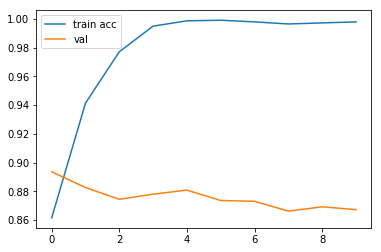

In [18]:
plt.plot(res['acc'],label='train acc')
plt.plot(res['val_acc'],label='val')
plt.legend()

In [19]:
model.evaluate(x_test,Y_test)

25000/25000 [==============================] - 7s 261us/step


[0.9159140002158285, 0.8564800024032593]